In [108]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [109]:

df = pd.read_csv("HealthCareData.csv")
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [110]:
# Check missing percentages
missing_percent = (df.isnull().sum()/len(df))* 100

missing_percent[missing_percent>0].sort_values(ascending=False)


MCHC  (grams/deciliter)                                                    70.736842
MCH  (picograms/cell)                                                      69.263158
RBC  (million cells/microliter)                                            58.105263
HDL                                                                        38.736842
TG                                                                         37.789474
TCH                                                                        37.789474
LDL                                                                        37.789474
A/G Ratio                                                                  37.789474
Place(location where the patient lives)                                    14.105263
Total Protein     (g/dl)                                                    6.421053
Indirect     (mg/dl)                                                        5.789474
Predicted Value(Out Come-Patient suffering from liver  cirrosis o

In [111]:
df = pd.read_csv("HealthCareData.csv")  
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [112]:
# Drop high-null columns
df.drop(columns=['MCHC  (grams/deciliter)', 'MCH  (picograms/cell)', 'RBC  (million cells/microliter)'], inplace=True)

# Drop rows where target variable is null
df.dropna(subset=['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'], inplace=True)



In [113]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (896, 39)
<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 949
Data columns (total 39 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     896 non-null    int64  
 1   Age                                                                      896 non-null    int64  
 2   Gender                                                                   896 non-null    object 
 3   Place(location where the patient lives)                                  797 non-null    object 
 4   Duration of alcohol consumption(years)                                   896 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           896 non-null    int64  
 6   Type of alcohol consumed                                      

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),MCV (femtoliters/cell),Total Count,...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,896.000000,896.000000,896.000000,896.000000,572.000000,563.000000,896.000000,869.000000,887.000000,887.000000,...,850.000000,896.000000,896.000000,846.000000,841.000000,887.000000,867.000000,887.000000,896.000000,896.000000
mean,479.582589,50.614955,20.502232,5.339286,198.155594,35.440497,10.285045,33.875949,87.531003,8164.262683,...,0.492329,503.683754,4.059598,2.464539,5.610939,2.831003,3.247520,132.830891,81.208705,60.914062
std,275.849380,8.757832,7.943375,23.576877,26.665179,8.071826,1.953859,5.742367,13.679205,2255.661572,...,0.708839,6708.011490,2.795846,1.092479,1.302735,2.245406,1.350444,27.250834,30.780898,30.911920
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,60.000000,1200.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,240.750000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,31.000000,78.000000,7000.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,486.500000,50.000000,20.000000,2.000000,198.000000,35.000000,10.000000,35.000000,87.000000,7500.000000,...,0.000000,1.420000,3.800000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,48.000000
75%,720.250000,57.000000,25.250000,3.000000,210.000000,38.000000,11.500000,38.000000,94.000000,9630.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,126.000000,13000.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


In [114]:
print(df.shape)

(896, 39)


In [145]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [146]:
# Fill all categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [119]:
df.isnull().sum()

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

In [121]:
df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']

0      YES
1      YES
2      YES
3      YES
4      YES
      ... 
945     no
946     no
947     no
948     no
949     no
Name: Predicted Value(Out Come-Patient suffering from liver  cirrosis or not), Length: 896, dtype: object

In [123]:
df.drop(columns=['S.NO'], inplace=True)

# Label encoding
binary_map = {'Yes': 1, 'No': 0, 'male': 1, 'female': 0,'yes': 1 ,'no': 0,'Positive': 1 ,'negative': 0,'YES' : 1 ,'NO': 0}
binary_cols = ['Gender', 'Hepatitis B infection', 'Hepatitis C infection',
               'Diabetes Result', 'Obesity', 'Family history of cirrhosis/ hereditary',
               'USG Abdomen (diffuse liver or  not)',
               'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']

for col in binary_cols:
    df[col] = df[col].map(binary_map)

# Convert numeric columns stored as object
df['TG'] = pd.to_numeric(df['TG'], errors='coerce')
df['LDL'] = pd.to_numeric(df['LDL'], errors='coerce')

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=[
    'Type of alcohol consumed', 'Place(location where the patient lives)'
], drop_first=True)

# Check final datatypes
print(df.dtypes)

Age                                                                          int64
Gender                                                                     float64
Duration of alcohol consumption(years)                                       int64
Quantity of alcohol consumption (quarters/day)                               int64
Hepatitis B infection                                                      float64
Hepatitis C infection                                                      float64
Diabetes Result                                                              int64
Blood pressure (mmhg)                                                       object
Obesity                                                                      int64
Family history of cirrhosis/ hereditary                                    float64
TCH                                                                        float64
TG                                                                         float64
LDL 

In [124]:
# Split the 'Blood pressure (mmhg)' column into two new columns
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood pressure (mmhg)'].str.split('/', expand=True)

In [125]:
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'], errors='coerce')
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'], errors='coerce')

In [126]:
df.drop('Blood pressure (mmhg)', axis=1, inplace=True)

In [127]:
# Step 1: Strip column names (in case of hidden spaces)
df.columns = df.columns.str.strip()

# Step 2: Convert 'Total Bilirubin (mg/dl)' to numeric
df['Total Bilirubin    (mg/dl)'] = pd.to_numeric(df['Total Bilirubin    (mg/dl)'], errors='coerce')

# Step 3: Convert 'A/G Ratio' to numeric
df['A/G Ratio'] = pd.to_numeric(df['A/G Ratio'], errors='coerce')

print(df.dtypes)

Age                                                                          int64
Gender                                                                     float64
Duration of alcohol consumption(years)                                       int64
Quantity of alcohol consumption (quarters/day)                               int64
Hepatitis B infection                                                      float64
Hepatitis C infection                                                      float64
Diabetes Result                                                              int64
Obesity                                                                      int64
Family history of cirrhosis/ hereditary                                    float64
TCH                                                                        float64
TG                                                                         float64
LDL                                                                        float64
HDL 

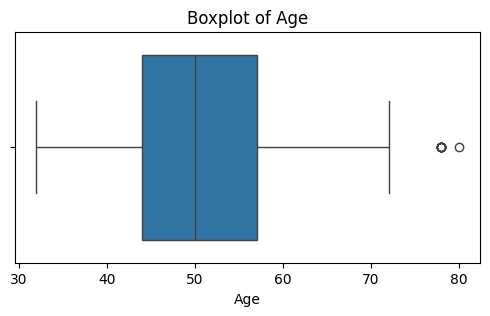

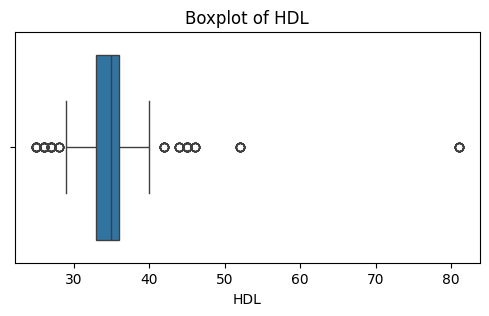

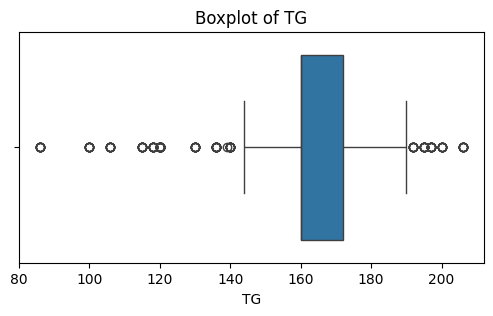

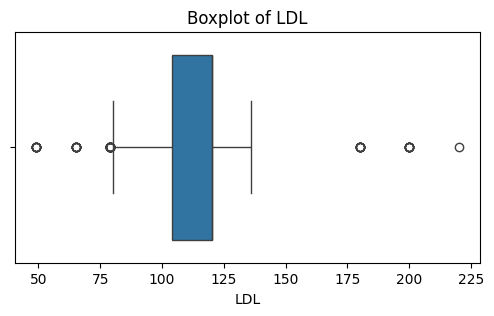

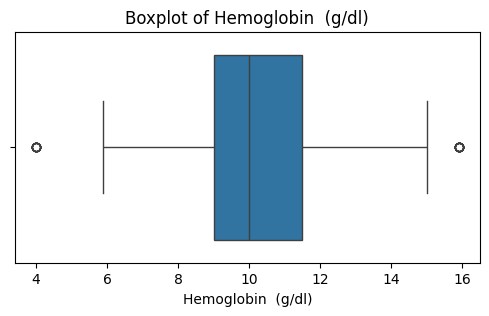

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a few features to see effect
features_to_plot = ['Age', 'HDL', 'TG', 'LDL', 'Hemoglobin  (g/dl)']

for feature in features_to_plot:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

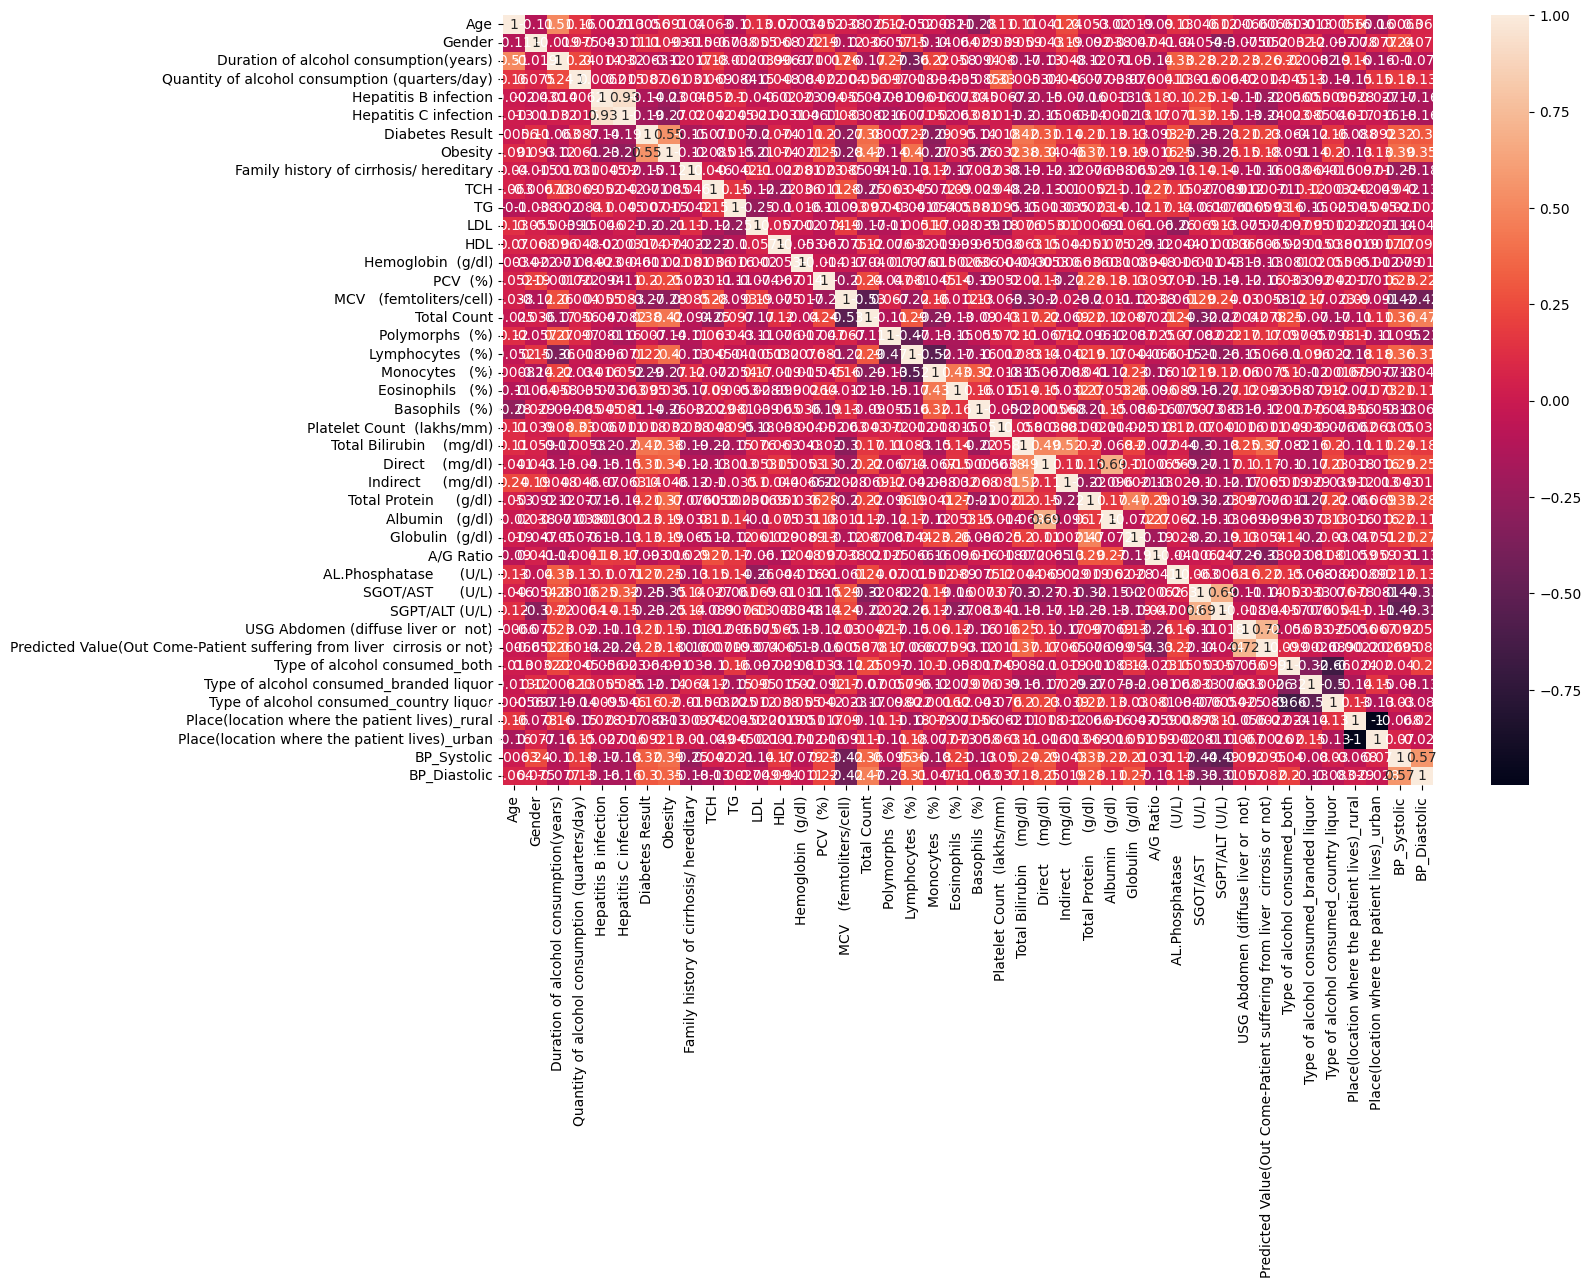

In [129]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# 1. Define feature variables (X) and target variable (y)
X = df.drop(columns=['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'])
y = df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']

In [131]:


# 2. Split into train and test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [132]:
X.columns.tolist()

['Age',
 'Gender',
 'Duration of alcohol consumption(years)',
 'Quantity of alcohol consumption (quarters/day)',
 'Hepatitis B infection',
 'Hepatitis C infection',
 'Diabetes Result',
 'Obesity',
 'Family history of cirrhosis/ hereditary',
 'TCH',
 'TG',
 'LDL',
 'HDL',
 'Hemoglobin  (g/dl)',
 'PCV  (%)',
 'MCV   (femtoliters/cell)',
 'Total Count',
 'Polymorphs  (%)',
 'Lymphocytes  (%)',
 'Monocytes   (%)',
 'Eosinophils   (%)',
 'Basophils  (%)',
 'Platelet Count  (lakhs/mm)',
 'Total Bilirubin    (mg/dl)',
 'Direct    (mg/dl)',
 'Indirect     (mg/dl)',
 'Total Protein     (g/dl)',
 'Albumin   (g/dl)',
 'Globulin  (g/dl)',
 'A/G Ratio',
 'AL.Phosphatase      (U/L)',
 'SGOT/AST      (U/L)',
 'SGPT/ALT (U/L)',
 'USG Abdomen (diffuse liver or  not)',
 'Type of alcohol consumed_both',
 'Type of alcohol consumed_branded liquor',
 'Type of alcohol consumed_country liquor',
 'Place(location where the patient lives)_rural',
 'Place(location where the patient lives)_urban',
 'BP_Systolic',


In [133]:
# Keep only numeric columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64']).copy()
X_test_num = X_test.select_dtypes(include=['int64', 'float64']).copy()

# Fill NaNs
X_train_num.fillna(X_train_num.median(), inplace=True)
X_test_num.fillna(X_test_num.median(), inplace=True)

# Normalize
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l1')
X_train_norm = normalizer.fit_transform(X_train_num)
X_test_norm = normalizer.transform(X_test_num)

In [134]:
X.columns.tolist()

['Age',
 'Gender',
 'Duration of alcohol consumption(years)',
 'Quantity of alcohol consumption (quarters/day)',
 'Hepatitis B infection',
 'Hepatitis C infection',
 'Diabetes Result',
 'Obesity',
 'Family history of cirrhosis/ hereditary',
 'TCH',
 'TG',
 'LDL',
 'HDL',
 'Hemoglobin  (g/dl)',
 'PCV  (%)',
 'MCV   (femtoliters/cell)',
 'Total Count',
 'Polymorphs  (%)',
 'Lymphocytes  (%)',
 'Monocytes   (%)',
 'Eosinophils   (%)',
 'Basophils  (%)',
 'Platelet Count  (lakhs/mm)',
 'Total Bilirubin    (mg/dl)',
 'Direct    (mg/dl)',
 'Indirect     (mg/dl)',
 'Total Protein     (g/dl)',
 'Albumin   (g/dl)',
 'Globulin  (g/dl)',
 'A/G Ratio',
 'AL.Phosphatase      (U/L)',
 'SGOT/AST      (U/L)',
 'SGPT/ALT (U/L)',
 'USG Abdomen (diffuse liver or  not)',
 'Type of alcohol consumed_both',
 'Type of alcohol consumed_branded liquor',
 'Type of alcohol consumed_country liquor',
 'Place(location where the patient lives)_rural',
 'Place(location where the patient lives)_urban',
 'BP_Systolic',


In [135]:
# 4. Save the normalizer (for use in Flask app later)
import joblib
joblib.dump(normalizer, 'normalizer.pkl')

print("✅ Data split and normalized. Ready for training!")

✅ Data split and normalized. Ready for training!


In [136]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [137]:
def models_eval_mm(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Ridge Classifier': RidgeClassifier(),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    results = {}

    for name, model in models.items():
        print(f"\n📌 Training: {name}")
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = accuracy_score(y_test, preds)
        print(f"✅ Accuracy: {acc:.4f}")
        print(classification_report(y_test, preds))

        results[name] = {
            'model': model,
            'accuracy': acc,
            'report': classification_report(y_test, preds, output_dict=True),
            'confusion_matrix': confusion_matrix(y_test, preds)
        }

    return results

In [138]:
results = models_eval_mm(X_train_norm, X_test_norm, y_train, y_test)


📌 Training: Logistic Regression
✅ Accuracy: 0.9722
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      1.00      0.99       175

    accuracy                           0.97       180
   macro avg       0.49      0.50      0.49       180
weighted avg       0.95      0.97      0.96       180


📌 Training: Ridge Classifier
✅ Accuracy: 0.9722
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.97      1.00      0.99       175

    accuracy                           0.97       180
   macro avg       0.49      0.50      0.49       180
weighted avg       0.95      0.97      0.96       180


📌 Training: KNN
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       175

    accuracy                           1.00  

c:\Users\mvasu\Liver_Cirrhosis_Predictor\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mvasu\Liver_Cirrhosis_Predictor\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mvasu\Liver_Cirrhosis_Predictor\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       175

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180


📌 Training: XGBoost
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       175

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



c:\Users\mvasu\Liver_Cirrhosis_Predictor\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:17:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("🏆 Best Accuracy After Tuning:", grid_search.best_score_)

# Predict on test set using best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score

print("\n📊 Classification Report After Tuning:")
print(classification_report(y_test, y_pred))
print("🎯 Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
🏆 Best Accuracy After Tuning: 1.0

📊 Classification Report After Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00       175

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

🎯 Test Accuracy: 1.0


In [140]:
preds = results['Random Forest']['model'].predict(X_test_norm)
import numpy as np
unique, counts = np.unique(preds, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(5), np.int64(1): np.int64(175)}


In [141]:
import joblib

# Save the trained Random Forest model
joblib.dump(results['Random Forest']['model'], 'rf_acc_68.pkl')

# Save the L1 normalizer
joblib.dump(normalizer, 'normalizer.pkl')

['normalizer.pkl']

In [142]:
X.columns.tolist()

['Age',
 'Gender',
 'Duration of alcohol consumption(years)',
 'Quantity of alcohol consumption (quarters/day)',
 'Hepatitis B infection',
 'Hepatitis C infection',
 'Diabetes Result',
 'Obesity',
 'Family history of cirrhosis/ hereditary',
 'TCH',
 'TG',
 'LDL',
 'HDL',
 'Hemoglobin  (g/dl)',
 'PCV  (%)',
 'MCV   (femtoliters/cell)',
 'Total Count',
 'Polymorphs  (%)',
 'Lymphocytes  (%)',
 'Monocytes   (%)',
 'Eosinophils   (%)',
 'Basophils  (%)',
 'Platelet Count  (lakhs/mm)',
 'Total Bilirubin    (mg/dl)',
 'Direct    (mg/dl)',
 'Indirect     (mg/dl)',
 'Total Protein     (g/dl)',
 'Albumin   (g/dl)',
 'Globulin  (g/dl)',
 'A/G Ratio',
 'AL.Phosphatase      (U/L)',
 'SGOT/AST      (U/L)',
 'SGPT/ALT (U/L)',
 'USG Abdomen (diffuse liver or  not)',
 'Type of alcohol consumed_both',
 'Type of alcohol consumed_branded liquor',
 'Type of alcohol consumed_country liquor',
 'Place(location where the patient lives)_rural',
 'Place(location where the patient lives)_urban',
 'BP_Systolic',


In [143]:
X.shape

(896, 41)

In [144]:
X.columns.tolist()

['Age',
 'Gender',
 'Duration of alcohol consumption(years)',
 'Quantity of alcohol consumption (quarters/day)',
 'Hepatitis B infection',
 'Hepatitis C infection',
 'Diabetes Result',
 'Obesity',
 'Family history of cirrhosis/ hereditary',
 'TCH',
 'TG',
 'LDL',
 'HDL',
 'Hemoglobin  (g/dl)',
 'PCV  (%)',
 'MCV   (femtoliters/cell)',
 'Total Count',
 'Polymorphs  (%)',
 'Lymphocytes  (%)',
 'Monocytes   (%)',
 'Eosinophils   (%)',
 'Basophils  (%)',
 'Platelet Count  (lakhs/mm)',
 'Total Bilirubin    (mg/dl)',
 'Direct    (mg/dl)',
 'Indirect     (mg/dl)',
 'Total Protein     (g/dl)',
 'Albumin   (g/dl)',
 'Globulin  (g/dl)',
 'A/G Ratio',
 'AL.Phosphatase      (U/L)',
 'SGOT/AST      (U/L)',
 'SGPT/ALT (U/L)',
 'USG Abdomen (diffuse liver or  not)',
 'Type of alcohol consumed_both',
 'Type of alcohol consumed_branded liquor',
 'Type of alcohol consumed_country liquor',
 'Place(location where the patient lives)_rural',
 'Place(location where the patient lives)_urban',
 'BP_Systolic',
